<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/Project_Data_analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Reading in the data

# Phase: -28, 15/02/17
A, F, E, G = np.loadtxt('Combined0217.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A1 = np.array_split(A, (len(A)/3))
F1 = np.array_split(F, (len(F)/3))
E1 = np.array_split(E, (len(E)/3))
G1 = np.array_split(G, (len(G)/3))


# Phase: -20, 15/02/25
A, F, E, G = np.loadtxt('Combined0225.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A2 = np.array_split(A, (len(A)/3))
F2 = np.array_split(F, (len(F)/3))
E2 = np.array_split(E, (len(E)/3))
G2 = np.array_split(G, (len(G)/3))

# Phase: -8, 15/03/11
A, F, E, G = np.loadtxt('Combined0311.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A3 = np.array_split(A, (len(A)/3))
F3 = np.array_split(F, (len(F)/3))
E3 = np.array_split(E, (len(E)/3))
G3 = np.array_split(G, (len(G)/3))

# Phase: -2, 15/03/18
A, F, E, G = np.loadtxt('Combined0318.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A4 = np.array_split(A, (len(A)/3))
F4 = np.array_split(F, (len(F)/3))
E4 = np.array_split(E, (len(E)/3))
G4 = np.array_split(G, (len(G)/3))

# Phase: +7, 15/03/27
A, F, E, G = np.loadtxt('Combined0327.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A5 = np.array_split(A, (len(A)/3))
F5 = np.array_split(F, (len(F)/3))
E5 = np.array_split(E, (len(E)/3))
G5 = np.array_split(G, (len(G)/3))

# Phase: +20, 15/04/11
A, F, E, G = np.loadtxt('Combined0411.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A6 = np.array_split(A, (len(A)/3))
F6 = np.array_split(F, (len(F)/3))
E6 = np.array_split(E, (len(E)/3))
G6 = np.array_split(G, (len(G)/3))

# 'Time' Array (Phase)
T = np.array([-28, -20, -8, -2, 7, 20])

In [3]:
# Mean wavelength for each absorption trough for each dataset
W0217 = np.mean(A1, axis = 1)
W0225 = np.mean(A2, axis = 1)
W0311 = np.mean(A3, axis = 1)
W0318 = np.mean(A4, axis = 1)
W0327 = np.mean(A5, axis = 1)
W0411 = np.mean(A6, axis = 1)
'''
print(W0217)
print(W0225)
print(W0311)
print(W0318)
print(W0327)
print(W0411)
'''

# Mean flux for each absorption trough for each dataset
F0217 = np.mean(F1, axis = 1)
F0225 = np.mean(F2, axis = 1)
F0311 = np.mean(F3, axis = 1)
F0318 = np.mean(F4, axis = 1)
F0327 = np.mean(F5, axis = 1)
F0411 = np.mean(F6, axis = 1)
'''
print(F0217)
print(F0225)
print(F0311)
print(F0318)
print(F0327)
print(F0411)
'''

# Mean equivalent width for each absorption trough for each dataset
E0217 = np.mean(E1, axis = 1)
E0225 = np.mean(E2, axis = 1)
E0311 = np.mean(E3, axis = 1)
E0318 = np.mean(E4, axis = 1)
E0327 = np.mean(E5, axis = 1)
E0411 = np.mean(E6, axis = 1)
'''
print(E0217)
print(E0225)
print(E0311)
print(E0318)
print(E0327)
print(E0411)
'''

# Mean full-width half maximum for each absorption trough for each dataset
G0217 = np.mean(G1, axis = 1)
G0225 = np.mean(G2, axis = 1)
G0311 = np.mean(G3, axis = 1)
G0318 = np.mean(G4, axis = 1)
G0327 = np.mean(G5, axis = 1)
G0411 = np.mean(G6, axis = 1)
'''
print(G0217)
print(G0225)
print(G0311)
print(G0318)
print(G0327)
print(G0411)
'''

'\nprint(G0217)\nprint(G0225)\nprint(G0311)\nprint(G0318)\nprint(G0327)\nprint(G0411)\n'

In [4]:
x217, y217 = np.loadtxt('20150217RER.txt',unpack = True,  dtype = float)
x225, y225 = np.loadtxt('20150225RER.txt',unpack = True,  dtype = float)
x311, y311 = np.loadtxt('20150311RER.txt',unpack = True,  dtype = float)
x318, y318 = np.loadtxt('20150318RER.txt',unpack = True,  dtype = float)
x327, y327 = np.loadtxt('20150327RRE.txt',unpack = True,  dtype = float)
x411, y411 = np.loadtxt('20150411RER.txt',unpack = True,  dtype = float)


''

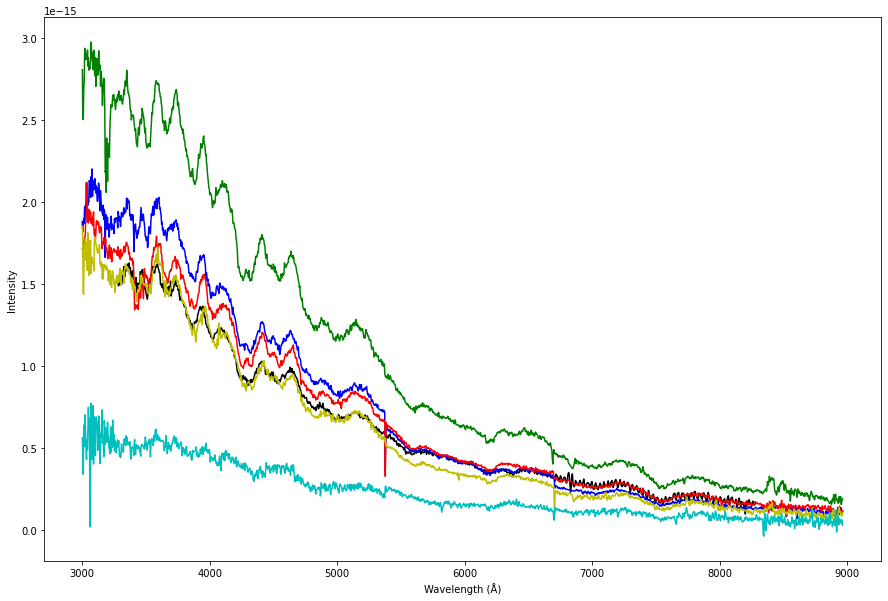

In [5]:
plt.figure(figsize = (15,10))
xlabel('Wavelength (Å)')
ylabel('Intensity')
'''
plt.axvline(x = 3917.97, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)
plt.axvline(x = 4304.97, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)
plt.axvline(x = 4776.23, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)
plt.axvline(x = 5049.69, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)
plt.axvline(x = 5385.19, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)
plt.axvline(x = 6248.75, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)
plt.axvline(x = 7621.28, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)
plt.axvline(x = 8366.04, ymin = 0.05, ymax = 0.9, color = 'red', alpha = 0.75)

plt.axhline(y = 0.04e-15, xmin = 0.241, xmax = 0.325, color = 'red', alpha = 0.75)
'''
plt.plot(x217, y217, 'k')
plt.plot(x225, y225, 'b')
plt.plot(x311, y311, 'g')
plt.plot(x318, y318, 'r')
plt.plot(x327, y327, 'y')
plt.plot(x411, y411, 'c')
'''
plt.text(x = 3775, y = -0.1e-15, s = 'Ca II', fontsize = 14, fontweight = 'bold')
plt.text(x = 4200, y = -0.1e-15, s = 'Mg I]', fontsize = 14, fontweight = 'bold')
plt.text(x = 4975, y = -0.1e-15, s = 'Fe II', fontsize = 14, fontweight = 'bold')
plt.text(x = 6150, y = -0.1e-15, s = 'Si II', fontsize = 14, fontweight = 'bold')
plt.text(x = 7500, y = -0.1e-15, s = 'O I', fontsize = 14, fontweight = 'bold')
plt.text(x = 8200, y = -0.1e-15, s = 'Ca II', fontsize = 14, fontweight = 'bold')
'''
;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


(-38.0, -33.0)

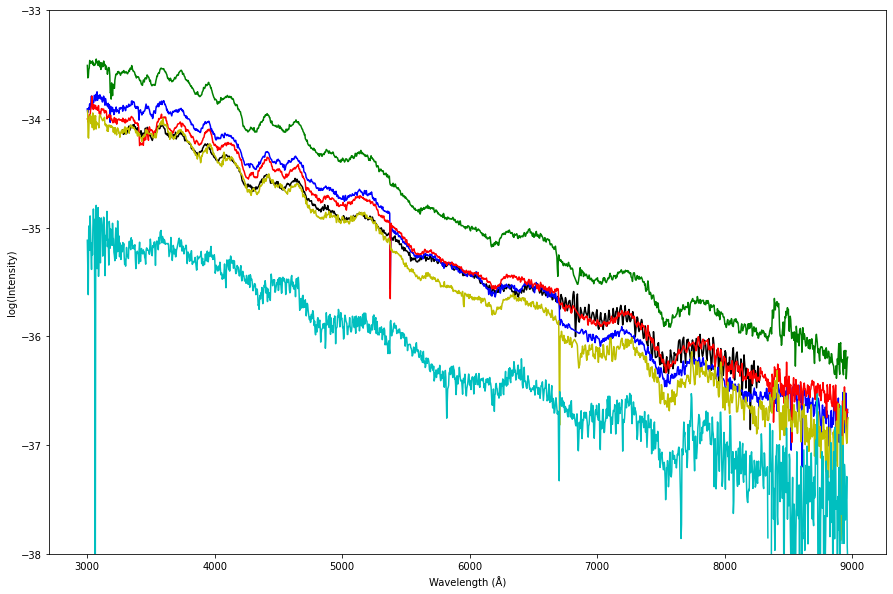

In [6]:
plt.figure(figsize = (15,10))
xlabel('Wavelength (Å)')
ylabel('log(Intensity)')

plt.plot(x217, np.log(y217), 'k', label= '-28d')
plt.plot(x225, np.log(y225), 'b', label= '-20d')
plt.plot(x311, np.log(y311), 'g', label= '-8d')
plt.plot(x318, np.log(y318), 'r', label= '-2d')
plt.plot(x327, np.log(y327), 'y', label= '+7d')
plt.plot(x411, np.log(y411), 'c', label= '+20d')

plt.ylim(-38, -33)

In [7]:
# Velocity calculation for each absorption trough for each dataset
# Where lmb0 - Mean absorption wavelength, lmb1 - lab rest frame wavelength

RestW = np.loadtxt('RestFrame.txt',usecols= [1], unpack = True, skiprows = 1)
print(RestW)
def func(lmb0, lmb1):
    return ((np.abs(lmb0 - lmb1))/lmb1) * 3e5



[3934.78 3969.59 4571.   4925.   5169.   5465.   5890.   5896.   6347.
 7291.   7324.   7775.   8498.   8542.   8662.  ]


''

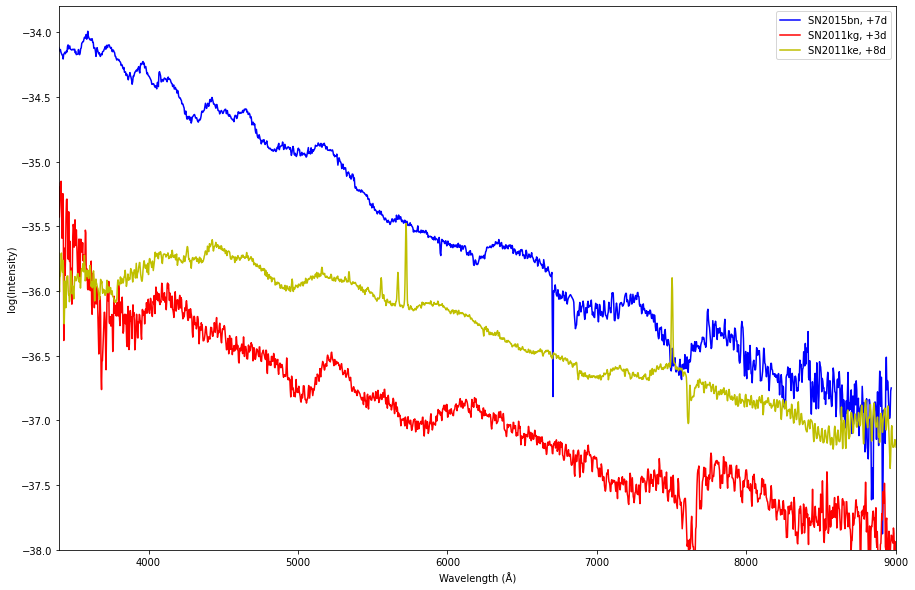

In [8]:
# A comparison between the SLSNe SN2011kg, SN2015bn, SN2011ke and SN2010md, at phase +3, +5, +7 and +8 (so all similar phases)
# Identifying similar absorption features, should be little to no H and He

# Reading in SN2011kg
Wkg0109, Ikg0109 = np.loadtxt('SN2011kg_2012-01-09.ascii', unpack = True,  dtype = float)

# Reading in SN2010md
Wmd0720, Imd0720 = np.loadtxt('SN2010md_2010-07-20.ascii', unpack = True,  dtype = float)

# Reading in SN2011ke
Wke0515, Ike0515 = np.loadtxt('SN2011ke_2011-05-15.ascii', unpack = True,  dtype = float)

plt.figure(figsize = (15,10))
xlabel('Wavelength (Å)')
ylabel('log(Intensity)')

plt.plot(x327, np.log(y327), 'b', label= 'SN2015bn, +7d')
#plt.plot(Wmd0720, np.log(Imd0720), 'g', label= 'SN2010md, +5d')
plt.plot(Wkg0109, np.log(Ikg0109), 'r', label= 'SN2011kg, +3d')
plt.plot(Wke0515, np.log(Ike0515), 'y', label= 'SN2011ke, +8d')

plt.legend(loc='best')
plt.xlim(3400, 9000)
plt.ylim(-38, -33.8)
;

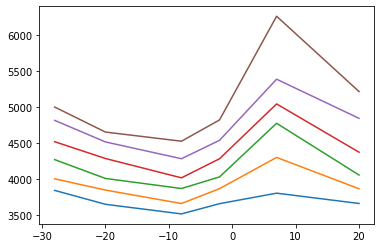

In [9]:
# Centroid wavelength evolution

W1 = np.array([W0217[0], W0225[0], W0311[0], W0318[0], W0327[0], W0411[0]])
W2 = np.array([W0217[1], W0225[1], W0311[1], W0318[1], W0327[1], W0411[1]])
W3 = np.array([W0217[2], W0225[2], W0311[2], W0318[2], W0327[2], W0411[2]])
W4 = np.array([W0217[3], W0225[3], W0311[3], W0318[3], W0327[3], W0411[3]])
W5 = np.array([W0217[4], W0225[4], W0311[4], W0318[4], W0327[4], W0411[4]])
W6 = np.array([W0217[5], W0225[5], W0311[5], W0318[5], W0327[5], W0411[5]])

plt.plot(T, W1)
plt.plot(T, W2)
plt.plot(T, W3)
plt.plot(T, W4)
plt.plot(T, W5)
plt.plot(T, W6)

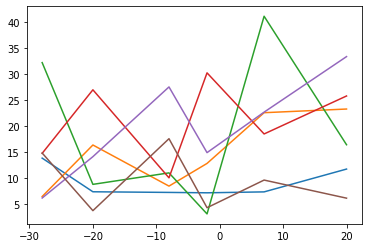

In [10]:
# Equivalent width evolution

Eqw1 = np.array([E0217[0], E0225[0], E0311[0], E0318[0], E0327[0], E0411[0]])
Eqw2 = np.array([E0217[1], E0225[1], E0311[1], E0318[1], E0327[1], E0411[1]])
Eqw3 = np.array([E0217[2], E0225[2], E0311[2], E0318[2], E0327[2], E0411[2]])
Eqw4 = np.array([E0217[3], E0225[3], E0311[3], E0318[3], E0327[3], E0411[3]])
Eqw5 = np.array([E0217[4], E0225[4], E0311[4], E0318[4], E0327[4], E0411[4]])
Eqw6 = np.array([E0217[5], E0225[5], E0311[5], E0318[5], E0327[5], E0411[5]])

plt.plot(T, Eqw1)
plt.plot(T, Eqw2)
plt.plot(T, Eqw3)
plt.plot(T, Eqw4)
plt.plot(T, Eqw5)
plt.plot(T, Eqw6)


In [11]:
# Finding the luminosity evolution over time

print(y327)
print(len(y327))


[1.852175e-15 1.451837e-15 1.437710e-15 ... 8.936474e-17 1.071434e-16
 1.096987e-16]
1630


In [12]:
# In report use literature to show the future evolution of the supernovae 
# -Leibundgut and Suntzeff 2003 paper
# Need to find a longer term study of a superluminous supernovae
# Talk about how a supernovae occurs in more detail in the context/introduction
# Determine any features of the progenitor?
# How to find the luminosity evolution/time
# Convert flux to luminosity
# SN2015 bn is a type SN Ibn supernovae
# Apropos 'bbody' on iraf to fit a black body to the datasets to find a black body fit of the
# How the equivalent width evolves for elements over time
# Phase of 0 is the peak luminosity of the data not the start
#   Find peak luminosity and therefore peak magnitude (bolometric)
#   Complete this for multiple SLSNe
#   Show that they are standardised candles (maybe try high/low redshifts)